<a href="https://colab.research.google.com/github/Saibot19/7506R-1C2023-GRUPO21/blob/main/7506R_TP1_GRUPO21_CHP4_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones

In [2]:
import pandas as pd
import random
import numpy as np
from google.colab import drive
import joblib  
import matplotlib.pyplot as plt
import seaborn as sns

#modelos y métricas
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, make_scorer#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

#Modelado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

import plotly.graph_objects as go
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

from sklearn.ensemble import VotingClassifier
from collections import defaultdict

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler


drive.mount('/content/drive', force_remount=True)
df_trabajo = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_train_filtered.csv")
df_test = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_test.csv")

df_trabajo

Mounted at /content/drive


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,agent_cancela_seguido,habitacion_correcta,estadia
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,False,True,Reserva con\nambos casos
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,False,True,Reservas entre\nsemana
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,False,True,Reservas entre\nsemana
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,True,True,Reserva con\nambos casos
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,True,True,Reserva con\nambos casos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60627,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,False,False,Reservas entre\nsemana
60628,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,False,True,Reservas entre\nsemana
60629,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,False,True,Reserva con\nambos casos
60630,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,False,True,Reserva con\nambos casos


In [3]:
df_trabajo_x = df_trabajo.drop(['is_canceled','id'], axis='columns')
df_trabajo_y = df_trabajo['is_canceled'].copy()

In [4]:
df_trabajo_x = pd.get_dummies(df_trabajo_x, columns=['hotel','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)
#df_trabajo_x_OHE = pd.get_dummies(df_trabajo_x_OHE, columns=['country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)

# Hay un par de variables que no consideramos que sea mejor con OHE como los mese que ya tienen un orden o meal que solo creemos que va agregar ruido
le = LabelEncoder()
# Convertimos nulos a string 'nan', es decir un valor posible mas
for column in df_trabajo_x.columns:
    if df_trabajo_x[column].dtype == 'object':
        df_trabajo_x[column] = le.fit_transform(df_trabajo_x[column])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x, 
                                                    df_trabajo_y, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=df_trabajo_y) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48505
# Datos Prueba: 12127
% Positivos Entrenamiento: 50.215
% Positivos Prueba: 50.219


In [6]:
#Armo una version escalada con minmax (media=0 , var=1  )
scaler=preprocessing.StandardScaler()
x_train_transform = scaler.fit_transform(x_train) 
x_test_transform  = scaler.transform(x_test) 

In [7]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))

In [8]:
cant_clases=len(np.unique(y_train))
d_in = len(x_train.columns)

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One hot encoding
enc = OneHotEncoder()
y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()

<ipython-input-9-3660c14f065e>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
<ipython-input-9-3660c14f065e>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()


# Redes Neuronales

## Red Generica

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)),
    keras.layers.Dense(1, activation='sigmoid')])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 64        
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.01), 
  loss='binary_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['AUC'], 
)

cant_epochs=100
modelo_reserva = modelo.fit(x_train_transform,y_train,epochs=cant_epochs,batch_size=50,verbose=False)

379/379 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      6037
           1       0.77      0.87      0.82      6090

    accuracy                           0.80     12127
   macro avg       0.81      0.80      0.80     12127
weighted avg       0.81      0.80      0.80     12127



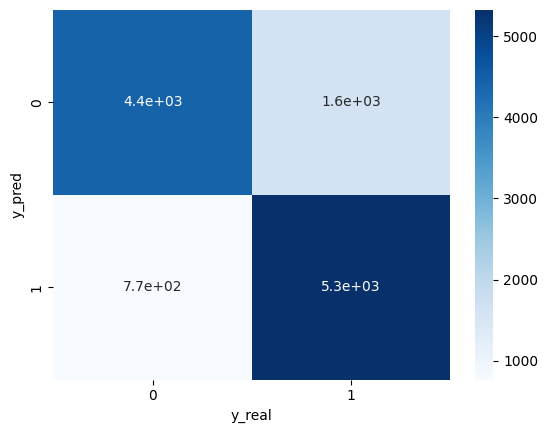

In [ ]:
y_predic_ej1 = modelo.predict(x_test_transform)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
metricas(y_predic_cat_ej1,y_test)
plt.show()

In [ ]:
joblib.dump(modelo, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_generica.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_generica.joblib']

## Red Neuronal 2

In [ ]:
modelo2 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_2.joblib")
modelo2.summary() 

In [13]:
modelo2= keras.Sequential([
keras.layers.Dense(64,input_shape=(d_in,), activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo2.compile(
  optimizer="adam", 
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['accuracy'], 
)

historia_modelo=modelo2.fit(x_train_transform,y_train,epochs=100,batch_size=50,callbacks = tf.keras.callbacks.EarlyStopping("accuracy", patience=10),verbose=False)


379/379 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      6037
           1       0.85      0.84      0.85      6090

    accuracy                           0.85     12127
   macro avg       0.85      0.85      0.85     12127
weighted avg       0.85      0.85      0.85     12127



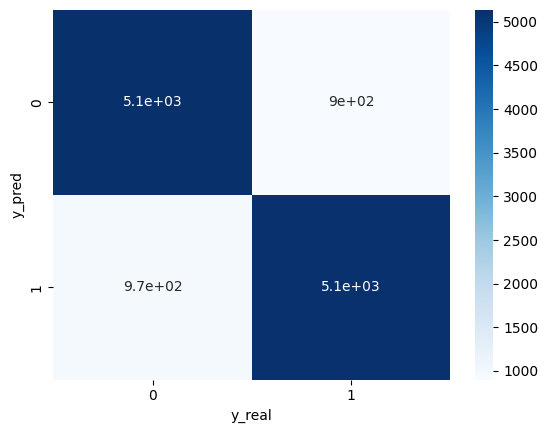

In [14]:
y_predic_ej1 = modelo2.predict(x_test_transform)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
metricas(y_predic_cat_ej1,y_test)
plt.show()

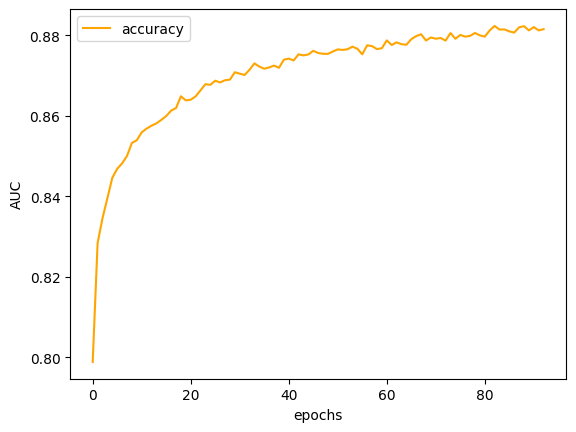

In [16]:
epochs = range(93)

plt.plot(epochs, historia_modelo.history['accuracy'], color='orange', label='accuracy')
plt.xlabel("epochs")
plt.ylabel("AUC")
plt.legend()

In [17]:
joblib.dump(modelo2, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_2.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_2.joblib']

## Red Neuronal GCV 1

Vamos a buscar la mejor cantidad de batch size para el modelo

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Create the sklearn model for the network

def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense(64,input_shape=(d_in,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

    modelo.compile(
      optimizer="adam", 
      loss='binary_crossentropy',
      # metricas para ir calculando en cada iteracion o batch 
      metrics=['accuracy'], 
    )
  
    return modelo

In [ ]:
modelo_cv = KerasClassifier(build_fn=create_model)

<ipython-input-61-916b8eeeda14>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_cv = KerasClassifier(build_fn=create_model)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'epochs': [100],
    'batch_size' : [10, 50,100,200],
    'callbacks' : [tf.keras.callbacks.EarlyStopping("accuracy",patience=5)]
}

print(param_grid)

grid = GridSearchCV(estimator=modelo_cv, param_grid=param_grid)
grid_result = grid.fit(x_train_transform, y_train)

{'epochs': [100], 'batch_size': [10, 50, 100, 200], 'callbacks': [<keras.callbacks.EarlyStopping object at 0x7f54eb90f610>]}
Epoch 1/100
3881/3881 [==============================] - 10s 2ms/step - loss: 0.3797 - accuracy: 0.8096
Epoch 2/100
3881/3881 [==============================] - 8s 2ms/step - loss: 0.3397 - accuracy: 0.8335
Epoch 3/100
3881/3881 [==============================] - 7s 2ms/step - loss: 0.3267 - accuracy: 0.8424
Epoch 4/100
3881/3881 [==============================] - 8s 2ms/step - loss: 0.3169 - accuracy: 0.8466
Epoch 5/100
3881/3881 [==============================] - 6s 2ms/step - loss: 0.3096 - accuracy: 0.8522
Epoch 6/100
3881/3881 [==============================] - 8s 2ms/step - loss: 0.3025 - accuracy: 0.8560
Epoch 7/100
3881/3881 [==============================] - 7s 2ms/step - loss: 0.2955 - accuracy: 0.8589
Epoch 8/100
3881/3881 [==============================] - 11s 3ms/step - loss: 0.2910 - accuracy: 0.8620
Epoch 9/100
3881/3881 [==========================

In [ ]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor modelo: 0.837831 {'batch_size': 50, 'callbacks': <keras.callbacks.EarlyStopping object at 0x7f54eb90f610>, 'epochs': 100}


In [ ]:
y_pred_cv = grid.predict(x_test_transform)

379/379 [==============================] - 0s 1ms/step


In [ ]:
y_pred_cv

array([0, 0, 1, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6037
           1       0.84      0.85      0.84      6090

    accuracy                           0.84     12127
   macro avg       0.84      0.84      0.84     12127
weighted avg       0.84      0.84      0.84     12127



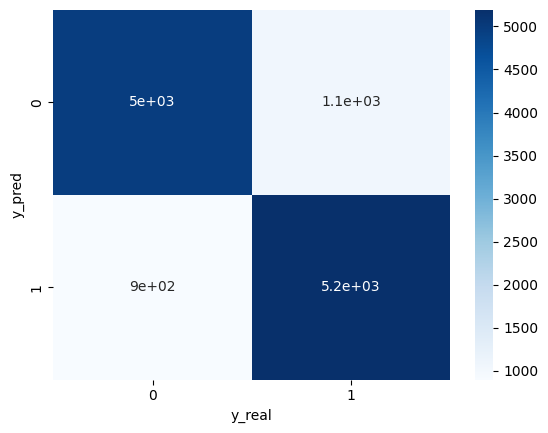

In [68]:
y_predic_cat_cv = np.where(y_predic_ej1>0.5,1,0)

ds_validation=pd.DataFrame(y_predic_cat_cv,y_test).reset_index()
ds_validation.columns=['y_pred','y_real']

tabla_iris=pd.crosstab(ds_validation.y_pred, ds_validation.y_real)
grf=sns.heatmap(tabla_iris,annot=True, cmap = 'Blues')
metricas(y_pred_cv,y_test)
plt.show()

In [ ]:
joblib.dump(grid, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_gcv_1.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_gcv_1.joblib']

## Red Neuronal 3

In [79]:
modelo3 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_3.joblib")
modelo3.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 63)                4032      
                                                                 
 dense_1 (Dense)             (None, 32)                2048      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6,753
Trainable params: 6,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo3= keras.Sequential([
keras.layers.Dense(63,input_shape=(d_in,), activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(16, activation='relu'),
keras.layers.Dense(8, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo3.compile(
  optimizer="adam", 
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['accuracy'], 
)

historia_modelo=modelo3.fit(x_train_transform,y_train,epochs=100,batch_size=50,callbacks = tf.keras.callbacks.EarlyStopping("accuracy", patience=5),verbose=False)

379/379 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6037
           1       0.85      0.83      0.84      6090

    accuracy                           0.84     12127
   macro avg       0.84      0.84      0.84     12127
weighted avg       0.84      0.84      0.84     12127



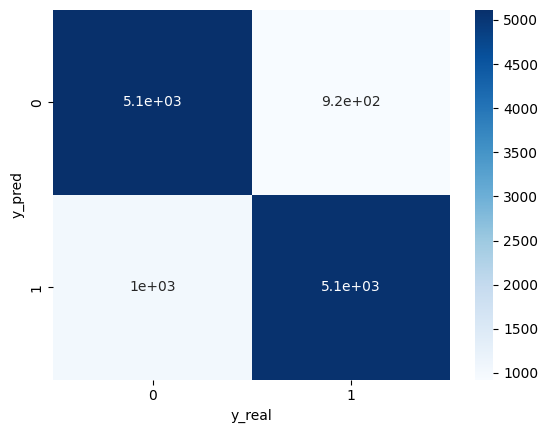

In [83]:
y_predic_ej1 = modelo3.predict(x_test_transform)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
metricas(y_predic_cat_ej1,y_test)
plt.show()

## Red Neuronal 4

In [81]:
modelo4 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_4.joblib")
modelo4.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 60)                3840      
                                                                 
 dense_6 (Dense)             (None, 28)                1708      
                                                                 
 dense_7 (Dense)             (None, 12)                348       
                                                                 
 dense_8 (Dense)             (None, 4)                 52        
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 5,961
Trainable params: 5,961
Non-traina

In [ ]:
modelo4= keras.Sequential([
keras.layers.Dense(60,input_shape=(d_in,), activation='relu'),
keras.layers.Dense(28, activation='relu'),
keras.layers.Dense(12, activation='relu'),
keras.layers.Dense(4, activation='relu'),
keras.layers.Dense(2, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo4.compile(
  optimizer="adam", 
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['accuracy'], 
)

historia_modelo=modelo4.fit(x_train_transform,y_train,epochs=100,batch_size=50,callbacks = tf.keras.callbacks.EarlyStopping("accuracy", patience=10),verbose=False)

379/379 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      6037
           1       0.86      0.82      0.84      6090

    accuracy                           0.84     12127
   macro avg       0.84      0.84      0.84     12127
weighted avg       0.84      0.84      0.84     12127



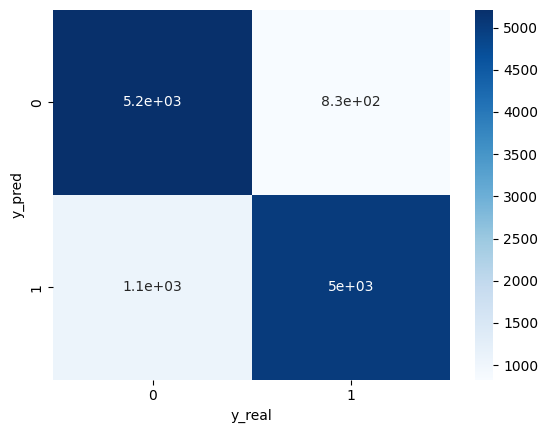

In [86]:
y_predic_ej1 = modelo4.predict(x_test_transform)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
metricas(y_predic_cat_ej1,y_test)
plt.show()

## Red Neuronal 5

In [18]:
modelo5 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_5.joblib")
modelo5.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 63)                4032      
                                                                 
 dense_1 (Dense)             (None, 40)                2560      
                                                                 
 dense_2 (Dense)             (None, 32)                1312      
                                                                 
 dense_3 (Dense)             (None, 20)                660       
                                                                 
 dense_4 (Dense)             (None, 16)                336       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [10]:
modelo5= keras.Sequential([
keras.layers.Dense(63,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
keras.layers.Dense(40, activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(20, activation='relu'),
keras.layers.Dense(16, activation='relu'),
keras.layers.Dense(8, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo5.compile(
  optimizer="adam", 
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['accuracy'], 
)

historia_modelo=modelo5.fit(x_train_transform,y_train,epochs=100,batch_size=50,callbacks = tf.keras.callbacks.EarlyStopping("accuracy", patience=10),verbose=False)

379/379 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      6037
           1       0.84      0.83      0.83      6090

    accuracy                           0.83     12127
   macro avg       0.83      0.83      0.83     12127
weighted avg       0.83      0.83      0.83     12127



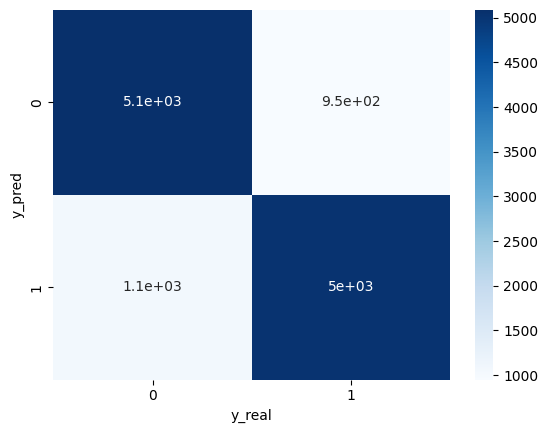

In [11]:
y_predic_ej1 = modelo5.predict(x_test_transform)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
metricas(y_predic_cat_ej1,y_test)
plt.show()

In [12]:
joblib.dump(modelo5,"/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_5.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_5.joblib']

## Red neuronal 6

In [87]:
modelo6 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_6.joblib")
modelo6.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 63)                4032      
                                                                 
 dense_27 (Dense)            (None, 32)                2048      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 6,753
Trainable params: 6,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo6= keras.Sequential([
keras.layers.Dense(64,input_shape=(d_in,), activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(16),
keras.layers.Dense(8),
keras.layers.Dense(1, activation='sigmoid')])

modelo6.compile(
  optimizer="adam", 
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['accuracy'], 
)

historia_modelo=modelo6.fit(x_train_transform,y_train,epochs=100,batch_size=50,callbacks = tf.keras.callbacks.EarlyStopping("accuracy", patience=10),verbose=False)

379/379 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6037
           1       0.85      0.83      0.84      6090

    accuracy                           0.84     12127
   macro avg       0.84      0.84      0.84     12127
weighted avg       0.84      0.84      0.84     12127



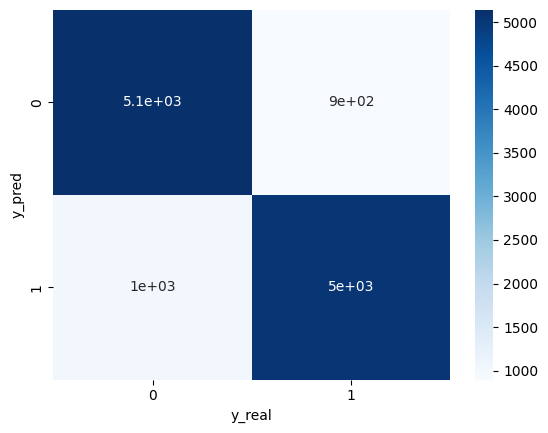

In [88]:
y_predic_ej1 = modelo6.predict(x_test_transform)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
metricas(y_predic_cat_ej1,y_test)
plt.show()

## Red Nerunal 7

In [89]:
modelo7 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_7.joblib")
modelo7.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 60)                3840      
                                                                 
 dense_32 (Dense)            (None, 28)                1708      
                                                                 
 dense_33 (Dense)            (None, 12)                348       
                                                                 
 dense_34 (Dense)            (None, 4)                 52        
                                                                 
 dense_35 (Dense)            (None, 2)                 10        
                                                                 
 dense_36 (Dense)            (None, 1)                 3         
                                                                 
Total params: 5,961
Trainable params: 5,961
Non-traina

In [ ]:
modelo7= keras.Sequential([
keras.layers.Dense(60,input_shape=(d_in,), activation='relu'),
keras.layers.Dense(28, activation='relu'),
keras.layers.Dense(12, activation='relu'),
keras.layers.Dense(4, activation='relu'),
keras.layers.Dense(2, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo7.compile(
  optimizer="adam", 
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['accuracy'], 
)

historia_modelo=modelo7.fit(x_train_transform,y_train,epochs=100,batch_size=50,callbacks = tf.keras.callbacks.EarlyStopping("accuracy", patience=10),verbose=False)

379/379 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      6037
           1       0.87      0.80      0.84      6090

    accuracy                           0.84     12127
   macro avg       0.84      0.84      0.84     12127
weighted avg       0.84      0.84      0.84     12127



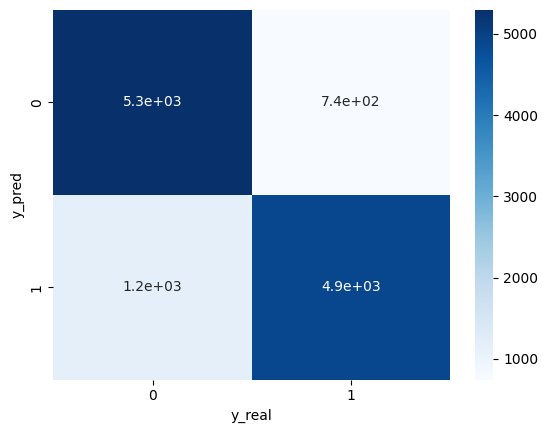

In [90]:
y_predic_ej1 = modelo7.predict(x_test_transform)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
metricas(y_predic_cat_ej1,y_test)
plt.show()

# Submit


In [19]:
#AGent
pivot_table = pd.pivot_table(df_trabajo, index="agent", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
pivot_table["Total"] = pivot_table["No Cancelado"] + pivot_table["Cancelado"]
pivot_table["Porcentaje de Cancelados"] = np.rint(pivot_table["Cancelado"]/pivot_table["Total"]*100)

agents = pivot_table[(pivot_table["Porcentaje de Cancelados"] > 65) & (pivot_table["Total"] > 100)].index.to_list()

df_test["agent_cancela_seguido"] = df_test["agent"].isin(agents)

#Habitacion correcta
df_test['habitacion_correcta'] = (df_test['reserved_room_type'] == df_test['assigned_room_type'])

#Estadia
stay_mapping = {
    0: "Reservas sin\nnoches",
    1: "Reservas entre\nsemana",
    2: "Reservas en fin\nde semana",
    3: "Reserva con\nambos casos"
}

df_test['estadia'] = (
    df_test['stays_in_weekend_nights'].apply(lambda x: 2 if x > 0 else 0) + 
    df_test['stays_in_week_nights'].apply(lambda x: 1 if x > 0 else 0)
)


df_test['estadia'] = df_test['estadia'].map(stay_mapping)

df_test['country'].fillna("Otros")

df_test.loc[df_test["assigned_room_type"].isin(["B", "C", "H","I","K","P","L"]), "assigned_room_type"] = "Otros"
df_test.loc[df_test["reserved_room_type"].isin(["B", "C", "H","I","K","P","L"]), "reserved_room_type"] = "Otros"

lista_paises = df_trabajo["country"].value_counts().index.to_list()
lista_paises.remove("Otros")

df_test.loc[~df_test["country"].isin(lista_paises), "country"] = "Otros"

In [20]:
X_submission = pd.get_dummies(df_test, columns=['hotel','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)

from sklearn.preprocessing import (
    LabelEncoder
)

le = LabelEncoder()
# Convertimos nulos a string 'nan', es decir un valor posible mas
for column in X_submission.columns:
    if X_submission[column].dtype == 'object':
        X_submission[column] = le.fit_transform(X_submission[column])

In [21]:
X_submission.drop(['id','company','reservation_status_date'], axis='columns',inplace=True)
X_submission.fillna(0, inplace=True)

X_submission_scaler = scaler.transform(X_submission) 

In [22]:
y_pred_1 = modelo2.predict(X_submission_scaler)
y_pred_modelo = np.where(y_pred_1 >0.5, 1,0)
y_pred = y_pred_modelo.flatten()

830/830 [==============================] - 1s 1ms/step


In [23]:
df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})
df_submission.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [24]:
df_submission.to_csv('/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Submission/chp4_redes_2.csv', index=False)